# エイムズ市の住宅価格


# Kaggleのカーネル

# データセットの準備

## 【問題1】データセットの取得

In [230]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats

house_data = pd.read_csv("train.csv")
print(house_data.shape)

(1460, 81)


## 【問題2】データセット自体の調査


・アイオワ州エイムスの住宅のあらゆる側面を説明する７９の特徴量のデータセット。
・各住宅の最終価格を予測することが目標

# データの概観

## 【問題3】データの確認

In [231]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


・文字データと数値が入り混じっている
・目的変数はSalesPrice

In [232]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [233]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【問題4】欠損値への対応

### 各特徴量の欠損値の有無を確認する。

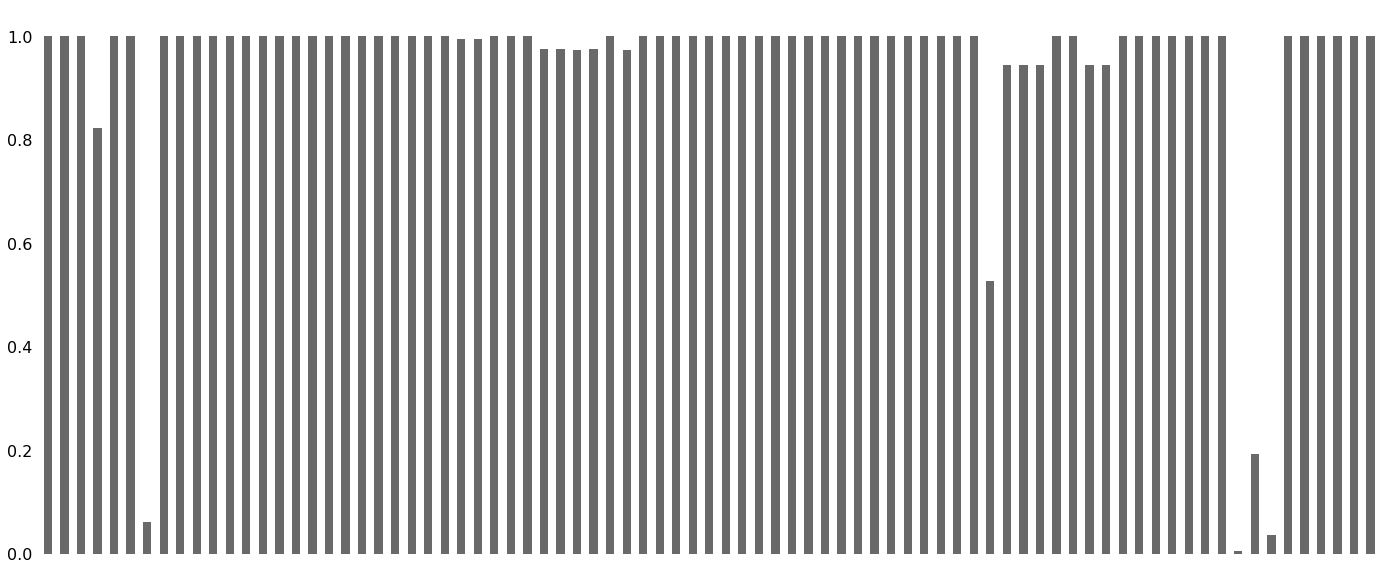

In [234]:
msno.bar(house_data)

### 欠損値が何パーセント含まれるかを確認する。


In [235]:
#列ごとの欠損量
column_null = house_data.isnull().sum()
column_null

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [236]:
# 行ごとの欠損量
row_null = house_data.isnull().sum(axis=1)
row_null

0        5
1        4
2        4
3        4
4        4
5        3
6        4
7        4
8        4
9        4
10       5
11       4
12       6
13       4
14       4
15       4
16       4
17       9
18       5
19       4
20       4
21       2
22       4
23       4
24       4
25       4
26       5
27       4
28       4
29       5
        ..
1430     4
1431     6
1432     4
1433     4
1434     4
1435     3
1436     4
1437     4
1438     4
1439     4
1440     4
1441     5
1442     4
1443     5
1444     5
1445     5
1446     6
1447     4
1448     4
1449    10
1450    10
1451     4
1452     5
1453    10
1454     4
1455     4
1456     3
1457     2
1458     5
1459     5
Length: 1460, dtype: int64

In [237]:
# 列ごとの欠損率
missing_value = column_null / 1460 * 100
missing_value

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

In [238]:
# 列ごとの欠損していない値の量
total = 1460 - column_null
total

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
                 ... 
BedroomAbvGr     1460
KitchenAbvGr     1460
KitchenQual      1460
TotRmsAbvGrd     1460
Functional       1460
Fireplaces       1460
FireplaceQu       770
GarageType       1379
GarageYrBlt      1379
GarageFinish     1379
GarageCars       1460
GarageArea       1460
GarageQual       1379
GarageCond       1379
PavedDrive

In [239]:
# 正常値の量と欠損率
missing_table = pd.concat([total, missing_value],axis=1,) 
missing_table.columns = ["total", "missing_ratio"]
missing_table

,total,missing_ratio
Id,1460,0.000000
MSSubClass,1460,0.000000
MSZoning,1460,0.000000
LotFrontage,1201,17.739726
LotArea,1460,0.000000
Street,1460,0.000000
Alley,91,93.767123
LotShape,1460,0.000000
LandContour,1460,0.000000
Utilities,1460,0.000000


### 5つ以上欠損値がある特徴量（列）は削除する。

In [240]:
house_data.dropna(thresh=1456, axis=1, inplace=True)
house_data.shape

(1460, 63)

### 欠損値があるサンプル（行）は削除する。

In [241]:
house_data.dropna(how='any', axis=0, inplace=True)
house_data.shape
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
ExterQual        1459 non-

# 目的変数


## 【問題5】用語の調査


### 尖度（せんど）

分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。サンプルサイズをn、各データ$x_{i}(i : 1,2, \cdots, n)$の平均値を$\overline{x}$、標準偏差をsとすると尖度は次の式から求められる。

$$
\frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum_{i=1}^{n} \frac{\left(x_{i}-\overline{x}\right)^{4}}{s^{4}}-\frac{3(n-1)^{2}}{(n-2)(n-3)}
$$

正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとる。正規分布の場合には0になる。

### 歪度（わいど）

分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のことです。サンプルサイズをn、各データ$x_{i}(i : 1,2, \cdots, n)$の平均値を$\overline{x}$、標準偏差をsとすると歪度は次の式から求められる。
$$
\frac{n}{(n-1)(n-2)} \sum_{i=1}^{n}\left(\frac{x_{i}-\overline{x}}{s}\right)^{3}
$$
「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとる。左右対称の分布（例えば正規分布）の場合には0になる。

## 【問題6】分布の確認


### seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

/Users/takamoriyuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


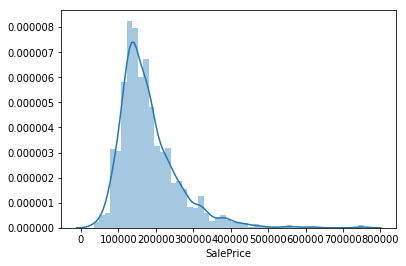

In [242]:
SalePrice = house_data["SalePrice"]

sns.distplot(SalePrice)

In [243]:
# 尖度
kurtosis = scipy.stats.kurtosis(SalePrice)
print(kurtosis)
# 歪度
skew = scipy.stats.skew(SalePrice)
print(skew)

6.502799105301849
1.880007613681095


### 目的変数に対して対数変換を行う。

In [244]:
log_SalePrice = np.log(SalePrice)

### 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

/Users/takamoriyuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


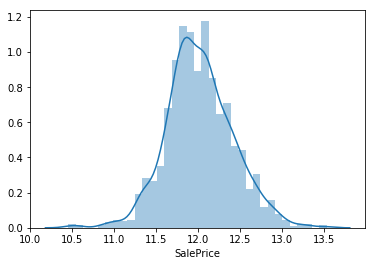

In [245]:
sns.distplot(log_SalePrice)

In [246]:
# 尖度
kurtosis = scipy.stats.kurtosis(log_SalePrice)
print(kurtosis)
# 歪度
skew = scipy.stats.skew(log_SalePrice)
print(skew)

0.8000555650770789
0.12119299622459463


### 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

対数変換後、目的変数の分布が正規分布に近づいた。
正規分布では平均と分散という２つの値で正規分布全体が決まる。
正規分布の平均０、分散１を平行移動し横に引き伸ばし、
正規化定数を調整することで、与えられた平均と分散を持つ、
より一般的な正規分布を考えられる。


# 特徴量

## 【問題7】相関係数の確認

### 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

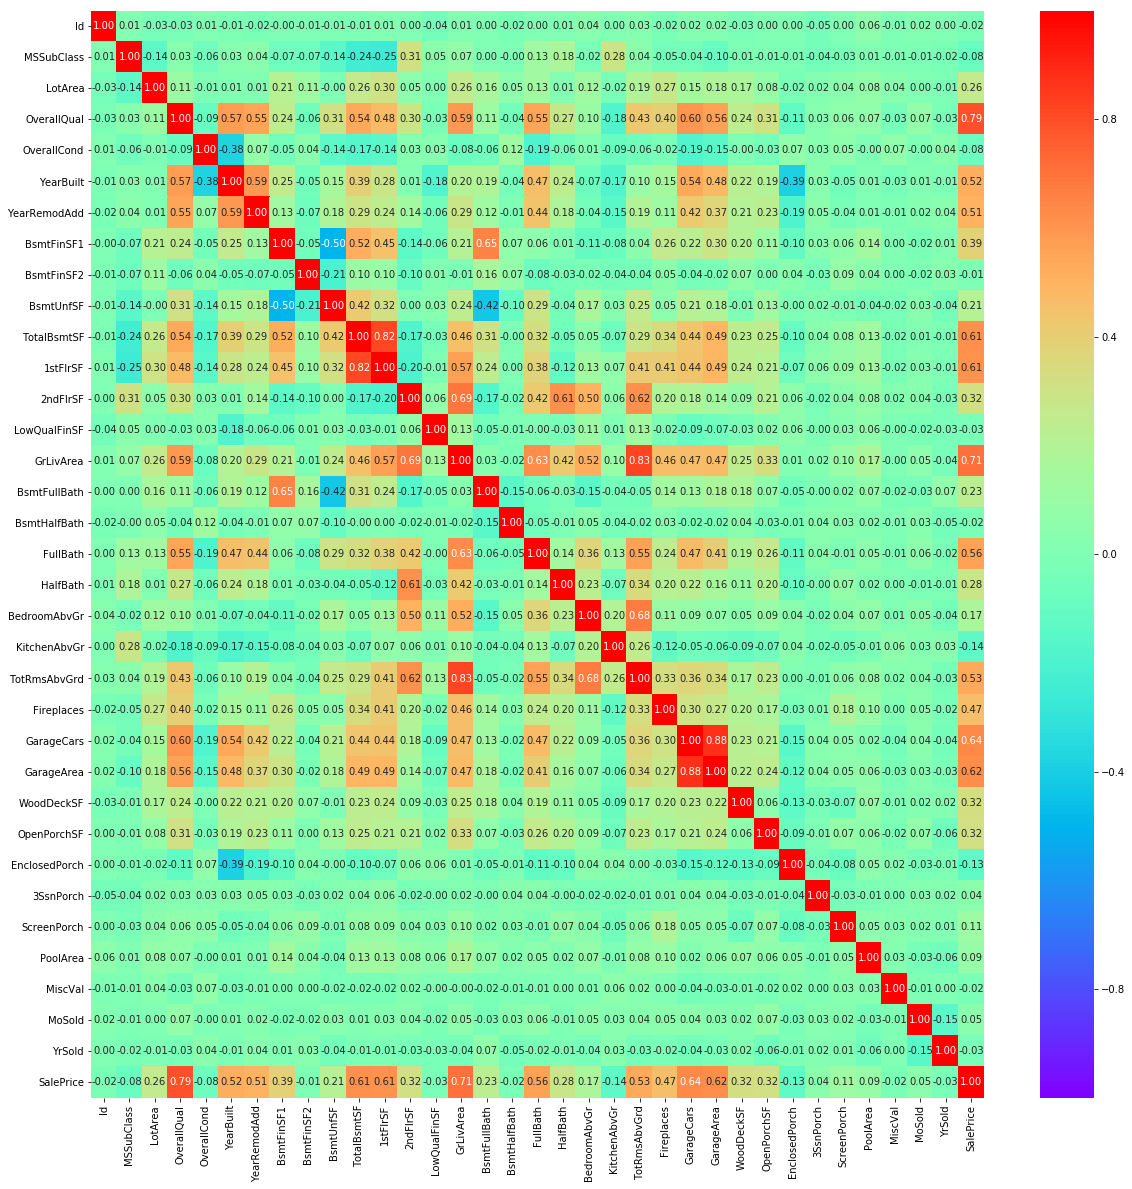

In [247]:
corr_mat = house_data.corr(method='pearson')


plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.2f',
            cmap='rainbow',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )

plt.show()

In [248]:
print(corr_mat)

                     Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.010589 -0.033170    -0.027553     0.013167   
MSSubClass     0.010589    1.000000 -0.139766     0.032936    -0.059134   
LotArea       -0.033170   -0.139766  1.000000     0.105786    -0.005665   
OverallQual   -0.027553    0.032936  0.105786     1.000000    -0.092243   
OverallCond    0.013167   -0.059134 -0.005665    -0.092243     1.000000   
YearBuilt     -0.013945    0.027435  0.014296     0.573334    -0.375780   
YearRemodAdd  -0.023158    0.040199  0.013852     0.551605     0.074158   
BsmtFinSF1    -0.004001   -0.069501  0.214121     0.239265    -0.046595   
BsmtFinSF2    -0.005668   -0.065549  0.111158    -0.059291     0.040132   
BsmtUnfSF     -0.007508   -0.140627 -0.002641     0.308018    -0.137008   
TotalBsmtSF   -0.013815   -0.238160  0.260962     0.537523    -0.171796   
1stFlrSF       0.011627   -0.251484  0.299533     0.475933    -0.144646   
2ndFlrSF       0.004885  

### 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [249]:
corr_mat2 = corr_mat.sort_values("SalePrice", ascending=False)
corr_mat3 = corr_mat2[1:11]
corr_mat3

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,-0.027553,0.032936,0.105786,1.000000,-0.092243,0.573334,0.551605,0.239265,-0.059291,0.308018,...,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
GrLivArea,0.008524,0.074949,0.263109,0.593021,-0.079777,0.199286,0.287677,0.208088,-0.009686,0.240210,...,0.247445,0.330175,0.009057,0.020625,0.101472,0.170198,-0.002430,0.050167,-0.036505,0.708618
GarageCars,0.016254,-0.040232,0.154893,0.600991,-0.185670,0.537866,0.420573,0.224342,-0.038204,0.214284,...,0.226340,0.213763,-0.151369,0.035791,0.050554,0.020949,-0.043063,0.040631,-0.039148,0.640473
GarageArea,0.018010,-0.098558,0.180392,0.561980,-0.151662,0.479460,0.372012,0.296851,-0.018295,0.183224,...,0.224686,0.241320,-0.121871,0.035061,0.051352,0.061034,-0.027422,0.027863,-0.027347,0.623423
TotalBsmtSF,-0.013815,-0.238160,0.260962,0.537523,-0.171796,0.393159,0.292546,0.521963,0.104593,0.415283,...,0.232255,0.246764,-0.095938,0.037292,0.084275,0.126083,-0.018586,0.012693,-0.014835,0.613905
1stFlrSF,0.011627,-0.251484,0.299533,0.475933,-0.144646,0.283056,0.241344,0.445473,0.096948,0.317827,...,0.235582,0.211278,-0.065580,0.056042,0.088598,0.131526,-0.021167,0.031032,-0.013508,0.605968
FullBath,0.004758,0.131354,0.126100,0.551267,-0.193929,0.467960,0.438733,0.059102,-0.076306,0.289189,...,0.187719,0.260459,-0.114928,0.035424,-0.007962,0.049652,-0.014245,0.056153,-0.019748,0.560881
TotRmsAbvGrd,0.026948,0.040274,0.190037,0.427720,-0.057485,0.095401,0.191603,0.044529,-0.035170,0.250754,...,0.165980,0.234382,0.004225,-0.006660,0.059441,0.083774,0.024782,0.037011,-0.034546,0.533779
YearBuilt,-0.013945,0.027435,0.014296,0.573334,-0.375780,1.000000,0.592512,0.250465,-0.048903,0.149444,...,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273
YearRemodAdd,-0.023158,0.040199,0.013852,0.551605,0.074158,0.592512,1.000000,0.129259,-0.067575,0.181520,...,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430


In [250]:
corr_mat4 = corr_mat3[corr_mat2[1:11].index]
corr_mat4

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593021,0.600991,0.561980,0.537523,0.475933,0.551267,0.427720,0.573334,0.551605
GrLivArea,0.593021,1.000000,0.467321,0.468971,0.455001,0.566084,0.630283,0.825576,0.199286,0.287677
GarageCars,0.600991,0.467321,1.000000,0.882613,0.435279,0.439726,0.469619,0.362248,0.537866,0.420573
GarageArea,0.561980,0.468971,0.882613,1.000000,0.486719,0.489741,0.405944,0.337915,0.479460,0.372012
TotalBsmtSF,0.537523,0.455001,0.435279,0.486719,1.000000,0.819393,0.324886,0.286125,0.393159,0.292546
1stFlrSF,0.475933,0.566084,0.439726,0.489741,0.819393,1.000000,0.381438,0.409901,0.283056,0.241344
FullBath,0.551267,0.630283,0.469619,0.405944,0.324886,0.381438,1.000000,0.554759,0.467960,0.438733
TotRmsAbvGrd,0.427720,0.825576,0.362248,0.337915,0.286125,0.409901,0.554759,1.000000,0.095401,0.191603
YearBuilt,0.573334,0.199286,0.537866,0.479460,0.393159,0.283056,0.467960,0.095401,1.000000,0.592512
YearRemodAdd,0.551605,0.287677,0.420573,0.372012,0.292546,0.241344,0.438733,0.191603,0.592512,1.000000


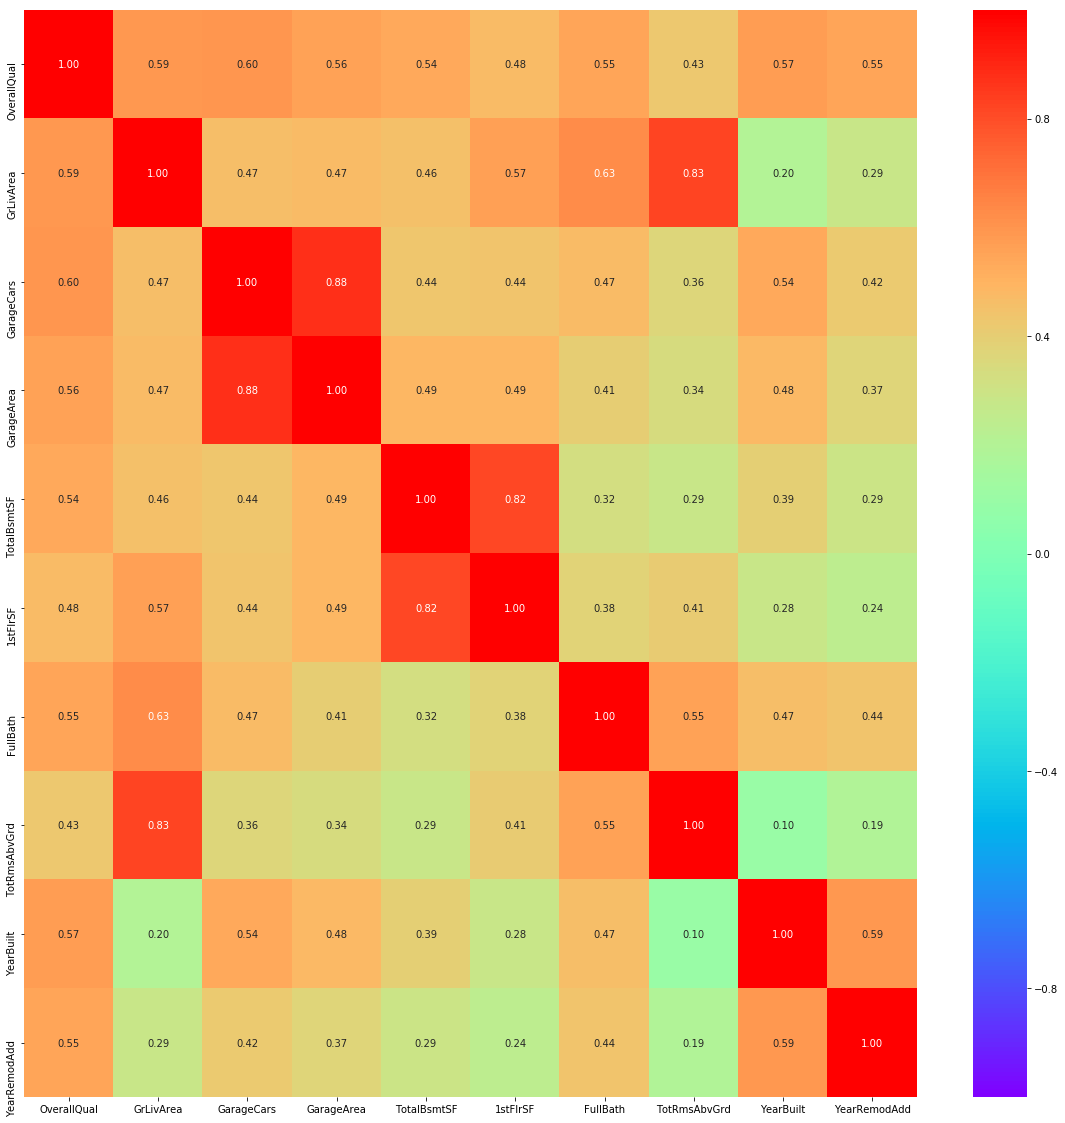

In [256]:

plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat4,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.2f',
            cmap='rainbow',
            xticklabels=corr_mat4.columns.values,
            yticklabels=corr_mat4.columns.values
           )
plt.show()                                                          

### 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

・OverallQual ：全体的な素材と仕上げの品質
・YearBuilt ：元の建設日
・TotalBsmtSF ：地下室の総平方フィート
・GrLivArea ：上階（地面）のリビングエリア平方フィート
・FullBath ：グレード以上のフルバスルーム
・GarageCars ：自動車容量のガレージサイズ
・GarageArea ：ガレージサイズ（平方フィート）
・TotRmsAbvGrd ：グレード以上の総客室数（バスルームは含まれません）
・YearRemodAdd ：改造日
・1stFlrSF：1階平方フィート


### 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。


In [257]:
corr_mat4

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593021,0.600991,0.561980,0.537523,0.475933,0.551267,0.427720,0.573334,0.551605
GrLivArea,0.593021,1.000000,0.467321,0.468971,0.455001,0.566084,0.630283,0.825576,0.199286,0.287677
GarageCars,0.600991,0.467321,1.000000,0.882613,0.435279,0.439726,0.469619,0.362248,0.537866,0.420573
GarageArea,0.561980,0.468971,0.882613,1.000000,0.486719,0.489741,0.405944,0.337915,0.479460,0.372012
TotalBsmtSF,0.537523,0.455001,0.435279,0.486719,1.000000,0.819393,0.324886,0.286125,0.393159,0.292546
1stFlrSF,0.475933,0.566084,0.439726,0.489741,0.819393,1.000000,0.381438,0.409901,0.283056,0.241344
FullBath,0.551267,0.630283,0.469619,0.405944,0.324886,0.381438,1.000000,0.554759,0.467960,0.438733
TotRmsAbvGrd,0.427720,0.825576,0.362248,0.337915,0.286125,0.409901,0.554759,1.000000,0.095401,0.191603
YearBuilt,0.573334,0.199286,0.537866,0.479460,0.393159,0.283056,0.467960,0.095401,1.000000,0.592512
YearRemodAdd,0.551605,0.287677,0.420573,0.372012,0.292546,0.241344,0.438733,0.191603,0.592512,1.000000


ヒートマップを見ると、
TotRmsAbvGrd＊GrLivArea（0.825576）
1stFlrSF＊TotalBsmtSF（0.819393）
GarageArea＊GarageCars（0.882613）
の３種が相関関係が強い正の相関を持つ。